In [118]:
import numpy as np
import pandas as pd

In [77]:
# https://www.kaggle.com/datasets/abdelrahmankhalil/100000-uk-used-car-data-set

In [128]:
import zipfile
archive = 'archive.zip'
with zipfile.ZipFile(archive, 'r') as zip_file:
    zip_file.extractall('unzipped_archive')

In [129]:
df = pd.read_csv('unzipped_archive/bmw.csv')

In [130]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


# Человеческое обучение - это создание алгоритма вручную

In [ ]:
Мы как люди - будем смотреть на данные и вырабатывать алгоритм.

Алгоритм определения цены по параметрам автомобиля, которые есть в df.

Выработка неких правил по которым мы сможем определять цену автомобиля.


In [ ]:
Прежде чем анализировать данные - надо разбить выборку на две части:

## Обучающая и тестовая выборка (train & test)

In [131]:
from sklearn.model_selection import train_test_split

# по умолчанию train_size = 0.75 

# по умолчанию выборки train и test получаются всегда разные при их определении, выбираются случайно
# но выборку можно захолдить, передав парамтетр random_state = 42

train, test = train_test_split(df, train_size = 0.75)

In [132]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1899,3 Series,2015,18555,Semi-Auto,51416,Diesel,145,53.3,3.0
10001,M2,2018,23495,Automatic,17000,Petrol,145,39.8,3.0
4250,X1,2019,25000,Manual,110,Diesel,145,60.1,2.0
5645,Z4,2019,43995,Automatic,4401,Petrol,145,33.2,3.0
8235,X1,2018,22470,Automatic,9365,Petrol,145,44.8,2.0
...,...,...,...,...,...,...,...,...,...
1746,3 Series,2019,25560,Semi-Auto,3000,Diesel,145,62.8,2.0
9562,1 Series,2017,10999,Manual,46147,Diesel,0,83.1,1.5
873,2 Series,2019,22500,Semi-Auto,5058,Petrol,145,50.4,2.0
5354,3 Series,2019,28450,Semi-Auto,13998,Petrol,145,42.2,2.0


In [133]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
5059,4 Series,2016,17995,Semi-Auto,36907,Diesel,30,65.7,2.0
290,1 Series,2017,16998,Semi-Auto,12458,Diesel,30,62.8,2.0
9498,3 Series,2016,10740,Automatic,91855,Diesel,0,74.3,2.0
2480,3 Series,2019,26498,Semi-Auto,17794,Diesel,145,48.7,2.0
10485,3 Series,2015,15500,Automatic,61980,Diesel,125,57.6,2.0
...,...,...,...,...,...,...,...,...,...
5575,X3,2017,19950,Automatic,49100,Diesel,145,54.3,2.0
7099,2 Series,2017,16990,Manual,13566,Diesel,30,64.2,2.0
1799,M3,2017,37572,Semi-Auto,30573,Petrol,300,34.0,3.0
9862,X1,2017,20990,Automatic,8000,Diesel,150,60.1,2.0


## Анализ данных

In [134]:
# проверка на пропуски (также в начале делать надо df.isna().mean())

train.isna().mean()

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64

In [135]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1899,3 Series,2015,18555,Semi-Auto,51416,Diesel,145,53.3,3.0
10001,M2,2018,23495,Automatic,17000,Petrol,145,39.8,3.0
4250,X1,2019,25000,Manual,110,Diesel,145,60.1,2.0
5645,Z4,2019,43995,Automatic,4401,Petrol,145,33.2,3.0
8235,X1,2018,22470,Automatic,9365,Petrol,145,44.8,2.0
...,...,...,...,...,...,...,...,...,...
1746,3 Series,2019,25560,Semi-Auto,3000,Diesel,145,62.8,2.0
9562,1 Series,2017,10999,Manual,46147,Diesel,0,83.1,1.5
873,2 Series,2019,22500,Semi-Auto,5058,Petrol,145,50.4,2.0
5354,3 Series,2019,28450,Semi-Auto,13998,Petrol,145,42.2,2.0


In [ ]:
# делаем предположение, что чем новее машина - тем она дороже. Так подсказывает опыт

<Axes: >

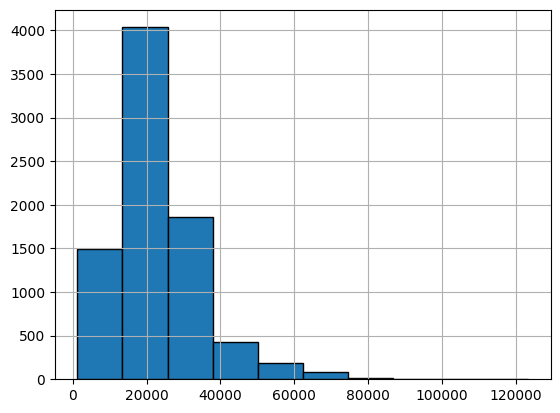

In [136]:
# посмотрим на распеределение величины price:

# это распределение с жирным хвостом - потому что хотя хвост и тонкий, однако там находятся жирные значения до 120 000

train['price'].hist(edgecolor = 'black')

In [137]:
# распределение понятно. теперь посмотрим на цифры:

df['price'].describe()

count     10781.000000
mean      22733.408867
std       11415.528189
min        1200.000000
25%       14950.000000
50%       20462.000000
75%       27940.000000
max      123456.000000
Name: price, dtype: float64

<Axes: xlabel='year'>

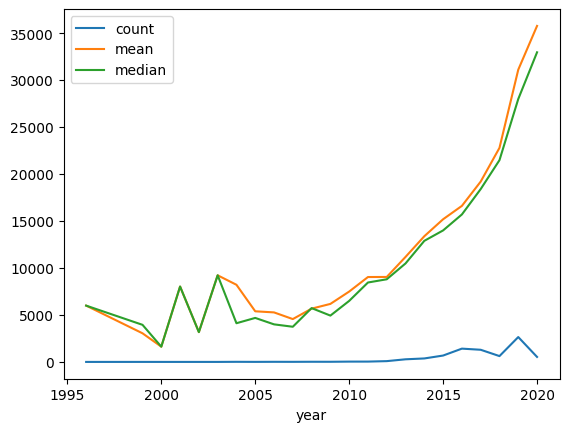

In [138]:
# понять зависимость между price и year поможет СВОДНИК - главный инструмент DS

train.groupby('year')['price'].agg(['count', 'mean', 'median']).plot()

## BaseLine

In [ ]:
# Перед тем как делать алгоритм нужно посчитать так назвыаемый BaseLine

# это исходная точка

# это то качество модели, та ошибка модели или алгоритма от которго мы будем отталкиваться.
# если мы не можем сделать лучше чем Baseline - то смысла в нашей работе не будет.


# Можно всем машинам, когда они поступают задавать одну цену: train['price'].mean()

# но на сколько хорош будет этот алгоритм??

In [139]:
train['price'].describe()

count      8085.00000
mean      22786.96945
std       11537.89565
min        1200.00000
25%       14881.00000
50%       20498.00000
75%       27950.00000
max      123456.00000
Name: price, dtype: float64

In [140]:
train['price'].mean()

22786.969449598022

In [141]:
# делаем новую колонку в train и задаем ей значения среднего:

train['price_pred_mean'] = train['price'].mean()

In [142]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean
1899,3 Series,2015,18555,Semi-Auto,51416,Diesel,145,53.3,3.0,22786.96945
10001,M2,2018,23495,Automatic,17000,Petrol,145,39.8,3.0,22786.96945
4250,X1,2019,25000,Manual,110,Diesel,145,60.1,2.0,22786.96945
5645,Z4,2019,43995,Automatic,4401,Petrol,145,33.2,3.0,22786.96945
8235,X1,2018,22470,Automatic,9365,Petrol,145,44.8,2.0,22786.96945
...,...,...,...,...,...,...,...,...,...,...
1746,3 Series,2019,25560,Semi-Auto,3000,Diesel,145,62.8,2.0,22786.96945
9562,1 Series,2017,10999,Manual,46147,Diesel,0,83.1,1.5,22786.96945
873,2 Series,2019,22500,Semi-Auto,5058,Petrol,145,50.4,2.0,22786.96945
5354,3 Series,2019,28450,Semi-Auto,13998,Petrol,145,42.2,2.0,22786.96945


In [143]:
train['err'] = train['price_pred_mean'] - train['price']

In [144]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err
1899,3 Series,2015,18555,Semi-Auto,51416,Diesel,145,53.3,3.0,22786.96945,4231.96945
10001,M2,2018,23495,Automatic,17000,Petrol,145,39.8,3.0,22786.96945,-708.03055
4250,X1,2019,25000,Manual,110,Diesel,145,60.1,2.0,22786.96945,-2213.03055
5645,Z4,2019,43995,Automatic,4401,Petrol,145,33.2,3.0,22786.96945,-21208.03055
8235,X1,2018,22470,Automatic,9365,Petrol,145,44.8,2.0,22786.96945,316.96945
...,...,...,...,...,...,...,...,...,...,...,...
1746,3 Series,2019,25560,Semi-Auto,3000,Diesel,145,62.8,2.0,22786.96945,-2773.03055
9562,1 Series,2017,10999,Manual,46147,Diesel,0,83.1,1.5,22786.96945,11787.96945
873,2 Series,2019,22500,Semi-Auto,5058,Petrol,145,50.4,2.0,22786.96945,286.96945
5354,3 Series,2019,28450,Semi-Auto,13998,Petrol,145,42.2,2.0,22786.96945,-5663.03055


In [145]:
np.mean(abs(train['err']))

8510.620221158233

In [146]:
train['err_abs'] = (abs(train['err']))

In [147]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs
1899,3 Series,2015,18555,Semi-Auto,51416,Diesel,145,53.3,3.0,22786.96945,4231.96945,4231.96945
10001,M2,2018,23495,Automatic,17000,Petrol,145,39.8,3.0,22786.96945,-708.03055,708.03055
4250,X1,2019,25000,Manual,110,Diesel,145,60.1,2.0,22786.96945,-2213.03055,2213.03055
5645,Z4,2019,43995,Automatic,4401,Petrol,145,33.2,3.0,22786.96945,-21208.03055,21208.03055
8235,X1,2018,22470,Automatic,9365,Petrol,145,44.8,2.0,22786.96945,316.96945,316.96945
...,...,...,...,...,...,...,...,...,...,...,...,...
1746,3 Series,2019,25560,Semi-Auto,3000,Diesel,145,62.8,2.0,22786.96945,-2773.03055,2773.03055
9562,1 Series,2017,10999,Manual,46147,Diesel,0,83.1,1.5,22786.96945,11787.96945,11787.96945
873,2 Series,2019,22500,Semi-Auto,5058,Petrol,145,50.4,2.0,22786.96945,286.96945,286.96945
5354,3 Series,2019,28450,Semi-Auto,13998,Petrol,145,42.2,2.0,22786.96945,-5663.03055,5663.03055


In [148]:
train['err_abs'].mean()

8510.620221158233

In [149]:
# посчитаем ошибку в процентах - на сколько в процентах мы ошибились при определении цены, относительно правильной цены:

# используя среднее значение:

train['err_abs_pct'] = train['err_abs'] / train['price']

In [150]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct
1899,3 Series,2015,18555,Semi-Auto,51416,Diesel,145,53.3,3.0,22786.96945,4231.96945,4231.96945,0.228077
10001,M2,2018,23495,Automatic,17000,Petrol,145,39.8,3.0,22786.96945,-708.03055,708.03055,0.030135
4250,X1,2019,25000,Manual,110,Diesel,145,60.1,2.0,22786.96945,-2213.03055,2213.03055,0.088521
5645,Z4,2019,43995,Automatic,4401,Petrol,145,33.2,3.0,22786.96945,-21208.03055,21208.03055,0.482055
8235,X1,2018,22470,Automatic,9365,Petrol,145,44.8,2.0,22786.96945,316.96945,316.96945,0.014106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,3 Series,2019,25560,Semi-Auto,3000,Diesel,145,62.8,2.0,22786.96945,-2773.03055,2773.03055,0.108491
9562,1 Series,2017,10999,Manual,46147,Diesel,0,83.1,1.5,22786.96945,11787.96945,11787.96945,1.071731
873,2 Series,2019,22500,Semi-Auto,5058,Petrol,145,50.4,2.0,22786.96945,286.96945,286.96945,0.012754
5354,3 Series,2019,28450,Semi-Auto,13998,Petrol,145,42.2,2.0,22786.96945,-5663.03055,5663.03055,0.199052


In [151]:
# теперь считаем среднее по этой ошибке:

# это наш Baseline - то есть максимальная ошибка которая может быть и ниже нее нет смысла считать что-то

train['err_abs_pct'].mean()

0.48849532412159324

In [152]:
# будет ли Baseline лучше если вместо среднего взять медиану??


train['price'].median()

20498.0

In [153]:
# делаем новую колонку в train и задаем ей значения медианы:

train['price_pred_median'] = train['price'].median()

In [154]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median
1899,3 Series,2015,18555,Semi-Auto,51416,Diesel,145,53.3,3.0,22786.96945,4231.96945,4231.96945,0.228077,20498.0
10001,M2,2018,23495,Automatic,17000,Petrol,145,39.8,3.0,22786.96945,-708.03055,708.03055,0.030135,20498.0
4250,X1,2019,25000,Manual,110,Diesel,145,60.1,2.0,22786.96945,-2213.03055,2213.03055,0.088521,20498.0
5645,Z4,2019,43995,Automatic,4401,Petrol,145,33.2,3.0,22786.96945,-21208.03055,21208.03055,0.482055,20498.0
8235,X1,2018,22470,Automatic,9365,Petrol,145,44.8,2.0,22786.96945,316.96945,316.96945,0.014106,20498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,3 Series,2019,25560,Semi-Auto,3000,Diesel,145,62.8,2.0,22786.96945,-2773.03055,2773.03055,0.108491,20498.0
9562,1 Series,2017,10999,Manual,46147,Diesel,0,83.1,1.5,22786.96945,11787.96945,11787.96945,1.071731,20498.0
873,2 Series,2019,22500,Semi-Auto,5058,Petrol,145,50.4,2.0,22786.96945,286.96945,286.96945,0.012754,20498.0
5354,3 Series,2019,28450,Semi-Auto,13998,Petrol,145,42.2,2.0,22786.96945,-5663.03055,5663.03055,0.199052,20498.0


In [159]:
# получаем ошибку относительно медианной цены и реальной цены:

train['err_median'] = train['price_pred_median'] - train['price']

In [160]:
# получаем модуль этой ошибки

np.mean(abs(train['err_median']))

8294.110080395794

In [161]:
# создаем столбец для ошибки

train['err_abs_median'] = (abs(train['err_median']))

In [162]:
# считаем среднее ошибки

train['err_abs_median'].mean()

8294.110080395794

In [163]:
# посчитаем ошибку в процентах - на сколько в процентах мы ошибились при определении цены, относительно правильной цены:

# используя медианное значение:

train['err_abs_pct_median'] = train['err_abs_median'] / train['price']

In [164]:
np.mean(train['err_abs_pct_median'])

0.43025879271115625

In [165]:
# Всё то же самое можно проделать с помощью специальных функций sklearn:

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# для среднего:
print(mean_absolute_error(train['price'], train['price_pred_mean']))
print(mean_absolute_percentage_error(train['price'], train['price_pred_mean']))

print('*'*20)

# для медианы:
print(mean_absolute_error(train['price'], train['price_pred_median']))
print(mean_absolute_percentage_error(train['price'], train['price_pred_median']))


# сравнивая абсолютную ошибку (в фунтах цены от каждой продажи) и ошибку в процентах - можно выбрать лучшую метрику
# в данном случае - для данной модели - медиана дает меньшее значение ошибки на 6%. Значит используем медиану.

8510.620221158233
0.48849532412159324
********************
8294.110080395794
0.43025879271115625


In [166]:
# теперь проверим ошибку на тестовой выборке:

test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
5059,4 Series,2016,17995,Semi-Auto,36907,Diesel,30,65.7,2.0
290,1 Series,2017,16998,Semi-Auto,12458,Diesel,30,62.8,2.0
9498,3 Series,2016,10740,Automatic,91855,Diesel,0,74.3,2.0
2480,3 Series,2019,26498,Semi-Auto,17794,Diesel,145,48.7,2.0
10485,3 Series,2015,15500,Automatic,61980,Diesel,125,57.6,2.0
...,...,...,...,...,...,...,...,...,...
5575,X3,2017,19950,Automatic,49100,Diesel,145,54.3,2.0
7099,2 Series,2017,16990,Manual,13566,Diesel,30,64.2,2.0
1799,M3,2017,37572,Semi-Auto,30573,Petrol,300,34.0,3.0
9862,X1,2017,20990,Automatic,8000,Diesel,150,60.1,2.0


In [167]:
# добавляем колонку в test - в которой указваем медиану из набора train

test['price_pred_median'] = train['price'].median()

In [168]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median
5059,4 Series,2016,17995,Semi-Auto,36907,Diesel,30,65.7,2.0,20498.0
290,1 Series,2017,16998,Semi-Auto,12458,Diesel,30,62.8,2.0,20498.0
9498,3 Series,2016,10740,Automatic,91855,Diesel,0,74.3,2.0,20498.0
2480,3 Series,2019,26498,Semi-Auto,17794,Diesel,145,48.7,2.0,20498.0
10485,3 Series,2015,15500,Automatic,61980,Diesel,125,57.6,2.0,20498.0
...,...,...,...,...,...,...,...,...,...,...
5575,X3,2017,19950,Automatic,49100,Diesel,145,54.3,2.0,20498.0
7099,2 Series,2017,16990,Manual,13566,Diesel,30,64.2,2.0,20498.0
1799,M3,2017,37572,Semi-Auto,30573,Petrol,300,34.0,3.0,20498.0
9862,X1,2017,20990,Automatic,8000,Diesel,150,60.1,2.0,20498.0


In [169]:
# рассчитанные значения абсолютной ошибки цены в фунтах и ошибки в процетах:
print(mean_absolute_error(test['price'], test['price_pred_median']))
print(mean_absolute_percentage_error(test['price'], test['price_pred_median']))


# здесь характерно то, что ошибку мы считали от медианы выборки train, 
# добавили это значение из train в выборку test
# и уже считаем ошибки (абсолютную и в процентах) от цен, которые находятся в выборке test

7977.041172106825
0.4085416197909442


# Алгоритм (или Модель) на основе годовых данных